In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

In [2]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

In [3]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [4]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [5]:
# Read in an image
image = mpimg.imread('../test_images/straight_lines1.jpg')
print(image.shape)

(720, 1280, 3)


In [6]:
#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)


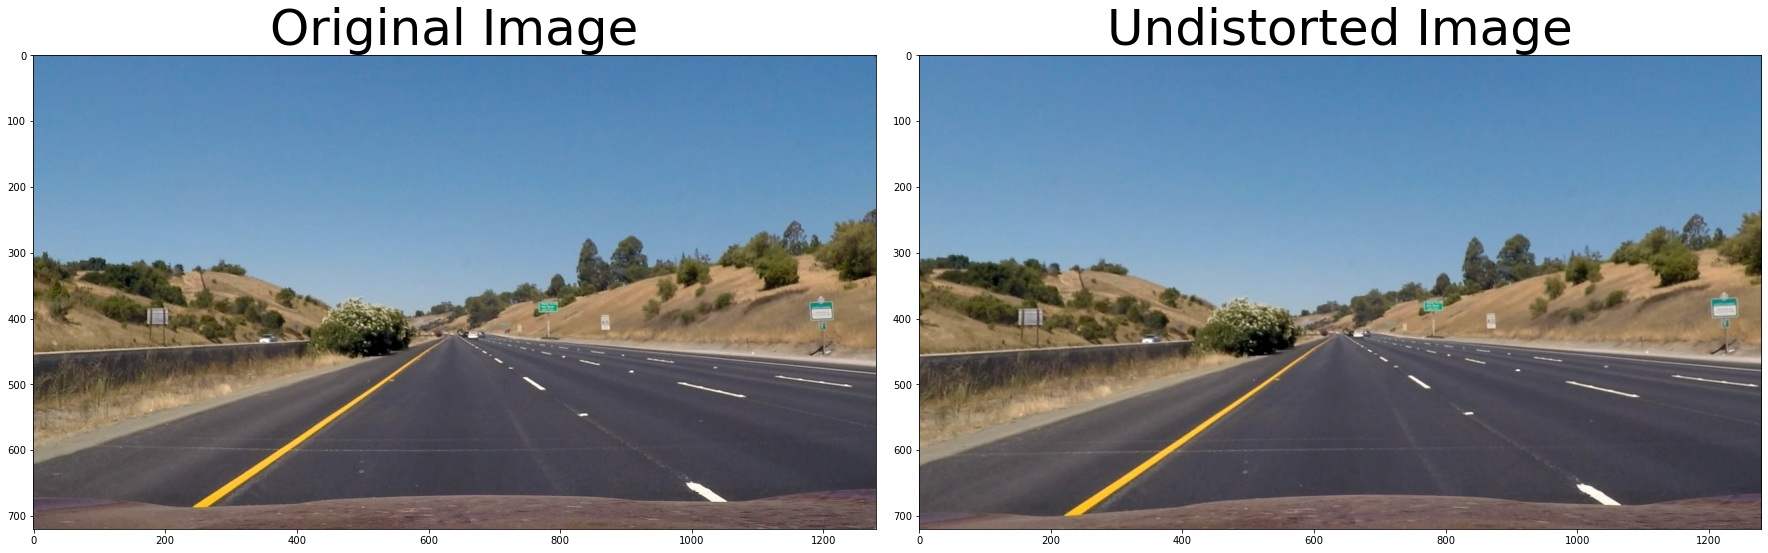

In [7]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Thresholding

We are going to try thresholding the undistorted image

In [8]:
from scripts.my_sobel_thresh import abs_sobel_thresh
from scripts.my_sobel_thresh import mag_thresh
from scripts.my_sobel_thresh import dir_threshold

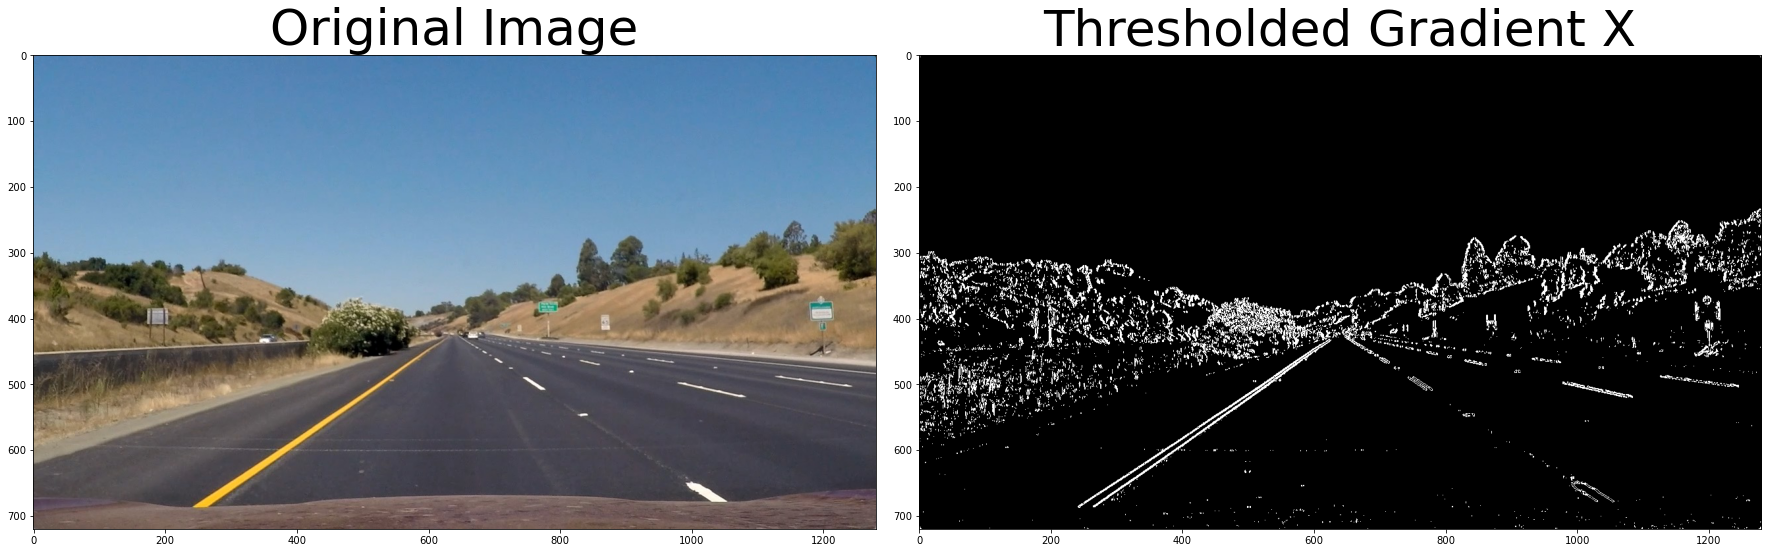

In [9]:
grad_x = abs_sobel_thresh(image, orient='x', thresh=(20, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_x, cmap='gray')
ax2.set_title('Thresholded Gradient X', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

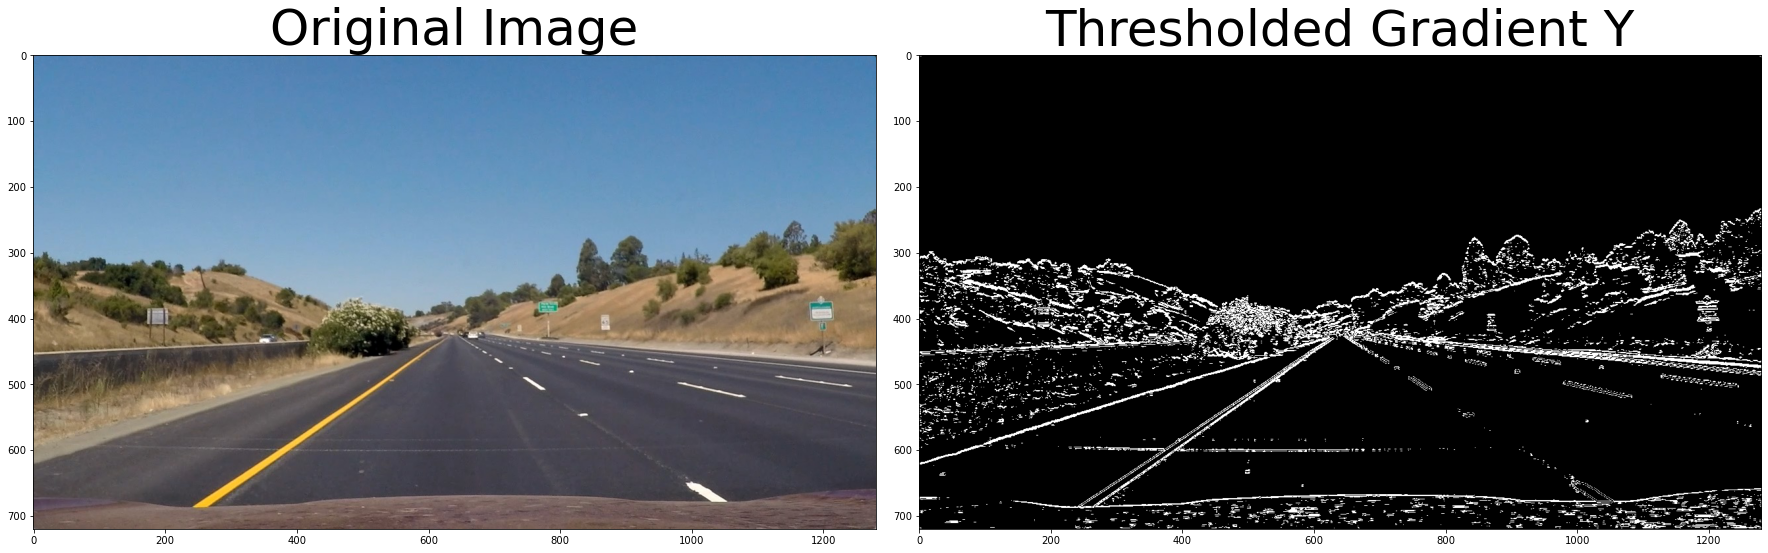

In [10]:
grad_y = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(20, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_y, cmap='gray')
ax2.set_title('Thresholded Gradient Y', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

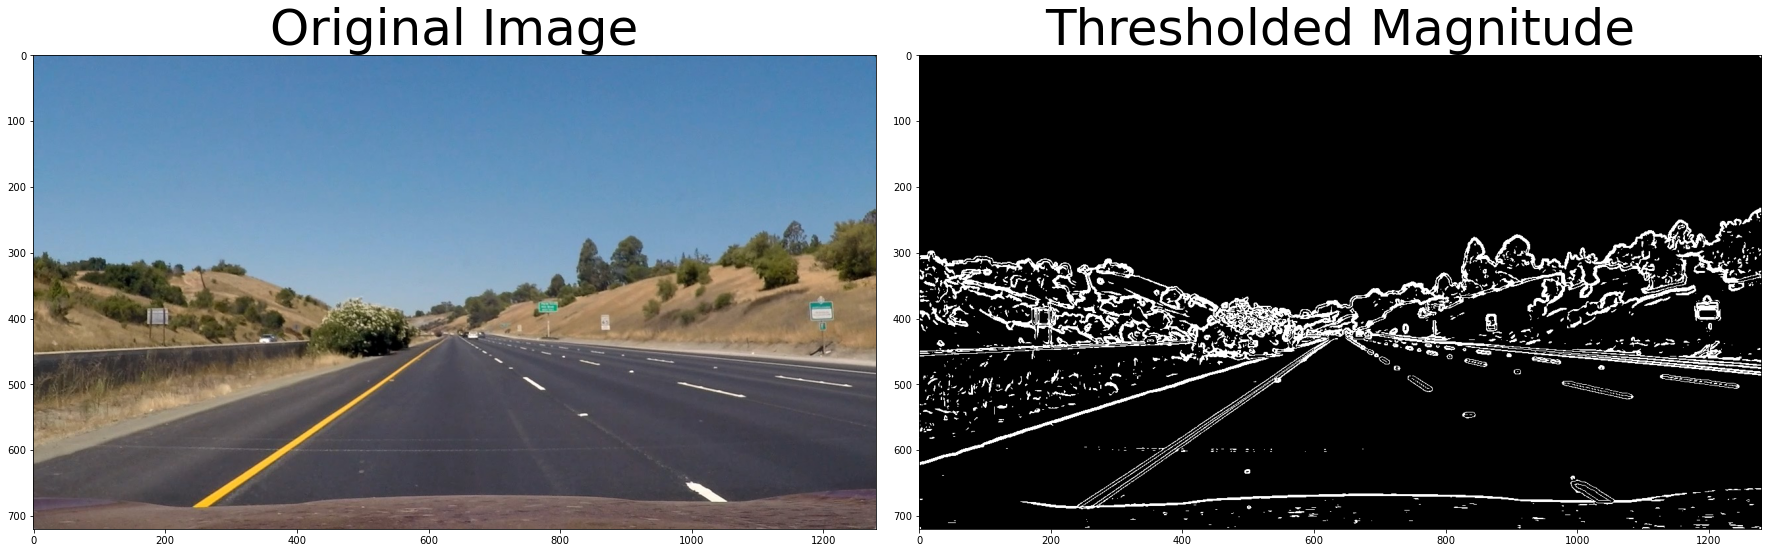

In [11]:
mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

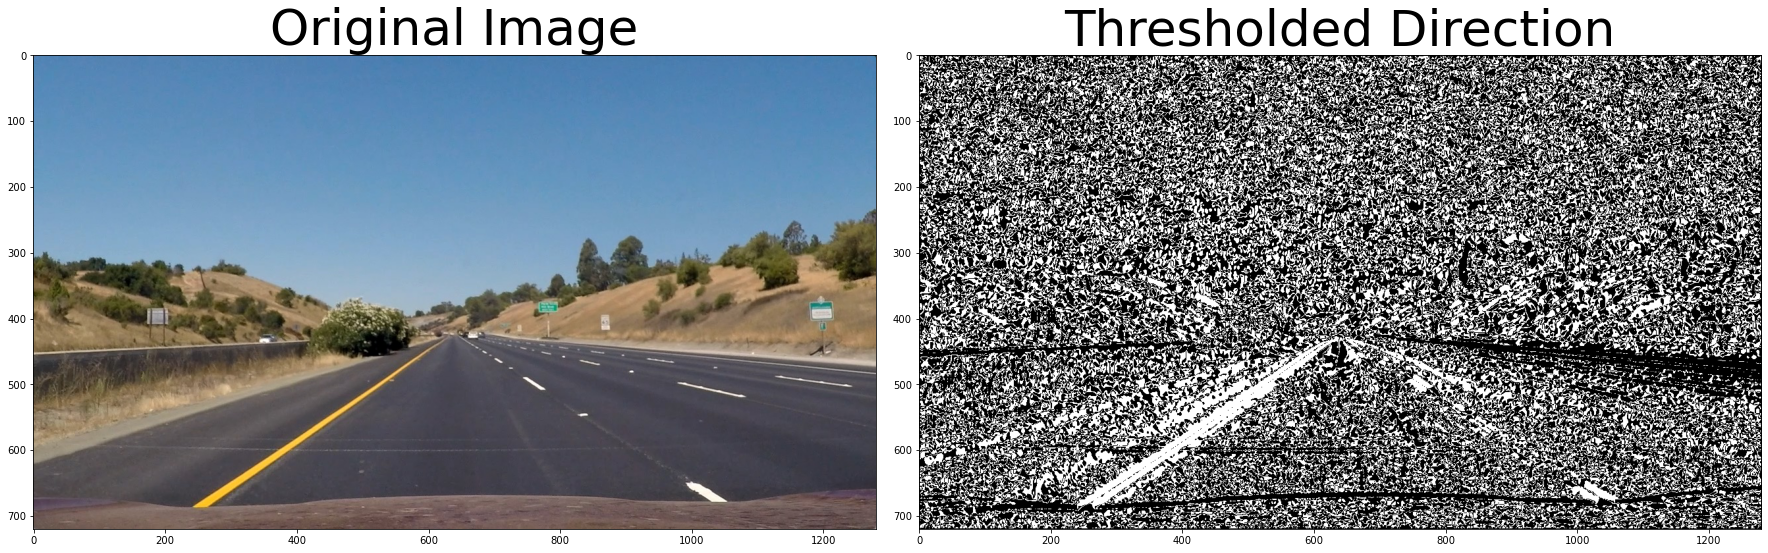

In [12]:
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Direction', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

(720, 1280)


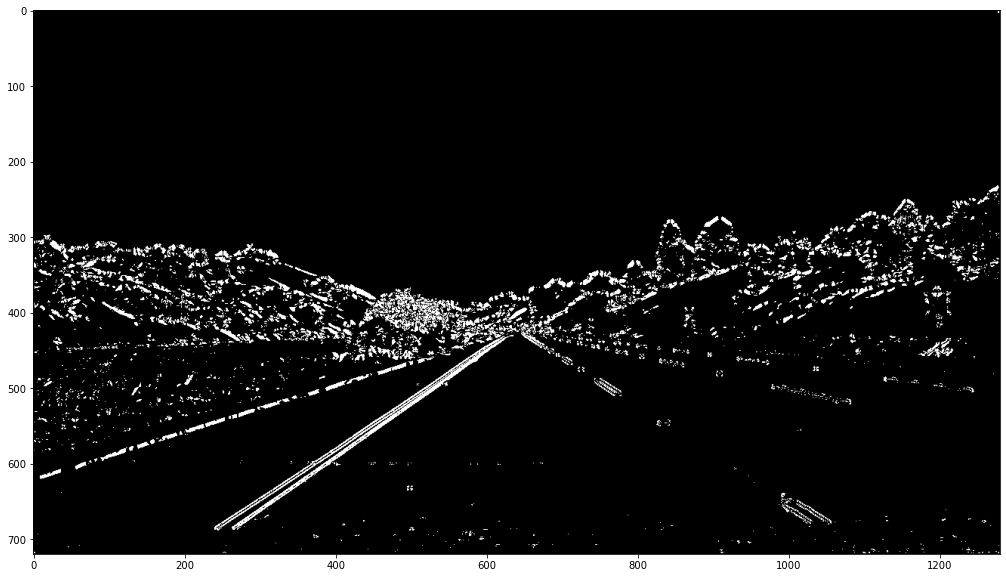

In [13]:
combined = np.zeros_like(dir_binary)
combined[((grad_x == 1) & (grad_y == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
print(combined.shape)
plt.figure(figsize=(20,10))
plt.imshow(combined,cmap='gray')